<a href="https://colab.research.google.com/github/pavansai26/feature-engineering/blob/master/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install feature_selector

In [0]:
from feature_selector import FeatureSelector

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/gdrive')

In [0]:
data=pd.read_csv('/gdrive/My Drive/Colab Notebooks/super_hero_powers.csv')

In [0]:
data

In [0]:
x=data.loc[:,data.columns !='Web Creation']

In [31]:
x.shape

(667, 167)

In [32]:
y.shape

(667, 1)

In [33]:
data.shape

(667, 168)

In [0]:
y=data.loc[:,data.columns=='Web Creation']

In [0]:
fs=FeatureSelector(x,y)

In [0]:
fs.identify_missing(missing_threshold=0.6)

In [0]:
fs.identify_missing(missing_threshold=0.2)

In [0]:
fs.missing_stats.head(50)

In [0]:
missing_features=fs.ops['missing']

In [0]:
missing_features

In [0]:

fs.plot_missing()


In [0]:
fs.identify_collinear(correlation_threshold=0.9,one_hot=True)

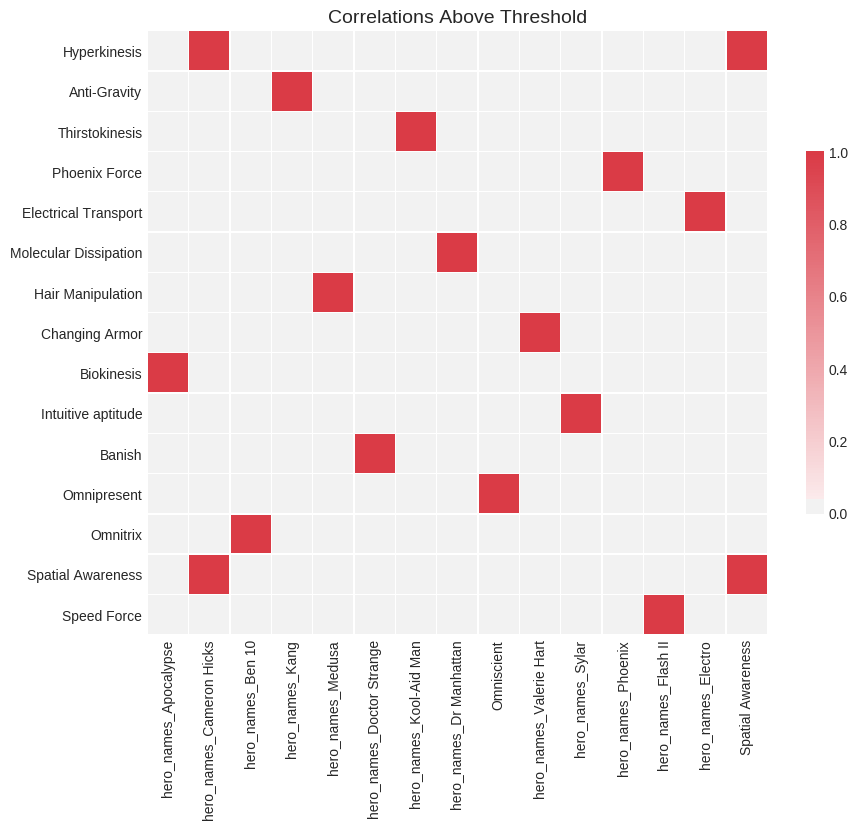

In [21]:
fs.plot_collinear()

In [0]:
collinear_features=fs.ops['collinear']

In [23]:
collinear_features

['Spatial Awareness',
 'Omniscient',
 'hero_names_Apocalypse',
 'hero_names_Ben 10',
 'hero_names_Cameron Hicks',
 'hero_names_Doctor Strange',
 'hero_names_Dr Manhattan',
 'hero_names_Electro',
 'hero_names_Flash II',
 'hero_names_Kang',
 'hero_names_Kool-Aid Man',
 'hero_names_Medusa',
 'hero_names_Phoenix',
 'hero_names_Sylar',
 'hero_names_Valerie Hart']

In [26]:
fs.record_collinear.head(15)


,drop_feature,corr_feature,corr_value
0,Spatial Awareness,Hyperkinesis,1.0
1,Omniscient,Omnipresent,1.0
2,hero_names_Apocalypse,Biokinesis,1.0
3,hero_names_Ben 10,Omnitrix,1.0
4,hero_names_Cameron Hicks,Hyperkinesis,1.0
5,hero_names_Cameron Hicks,Spatial Awareness,1.0
6,hero_names_Doctor Strange,Banish,1.0
7,hero_names_Dr Manhattan,Molecular Dissipation,1.0
8,hero_names_Electro,Electrical Transport,1.0
9,hero_names_Flash II,Speed Force,1.0


In [27]:
fs.identify_zero_importance(task='classification',
                            eval_metric='auc',
                            n_iterations=10,
                            early_stopping=True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[50]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[23]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[50]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[17]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[41]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 1
Trainin

In [0]:
zero_importance_features=fs.ops['zero_importance']

In [29]:
zero_importance_features

['hero_names_Metamorpho',
 'hero_names_Maya Herrera',
 'hero_names_Master Brood',
 'hero_names_Master Chief',
 'hero_names_Match',
 'hero_names_Matt Parkman',
 'hero_names_Maverick',
 'hero_names_Maxima',
 'hero_names_Micah Sanders',
 'hero_names_Medusa',
 'hero_names_Metallo',
 'hero_names_Peter Petrelli',
 'hero_names_Michelangelo',
 'hero_names_Mephisto',
 'hero_names_Marvel Girl',
 'hero_names_Penguin',
 'hero_names_Metron',
 'hero_names_Penance II',
 'hero_names_Mera',
 'hero_names_Meltdown',
 'hero_names_Phantom',
 'hero_names_Martian Manhunter',
 'hero_names_Mimic',
 'hero_names_Phantom Girl',
 'hero_names_Loki',
 'hero_names_Longshot',
 'hero_names_Lord Voldemort',
 'hero_names_Luke Cage',
 'hero_names_Luke Campbell',
 'hero_names_Luke Skywalker',
 'hero_names_Luna',
 'hero_names_Lyja',
 'hero_names_MODOK',
 'hero_names_Mach-IV',
 'hero_names_Machine Man',
 'hero_names_Magneto',
 'hero_names_Magog',
 'hero_names_Magus',
 'hero_names_Man of Miracles',
 'hero_names_Man-Bat',
 'he

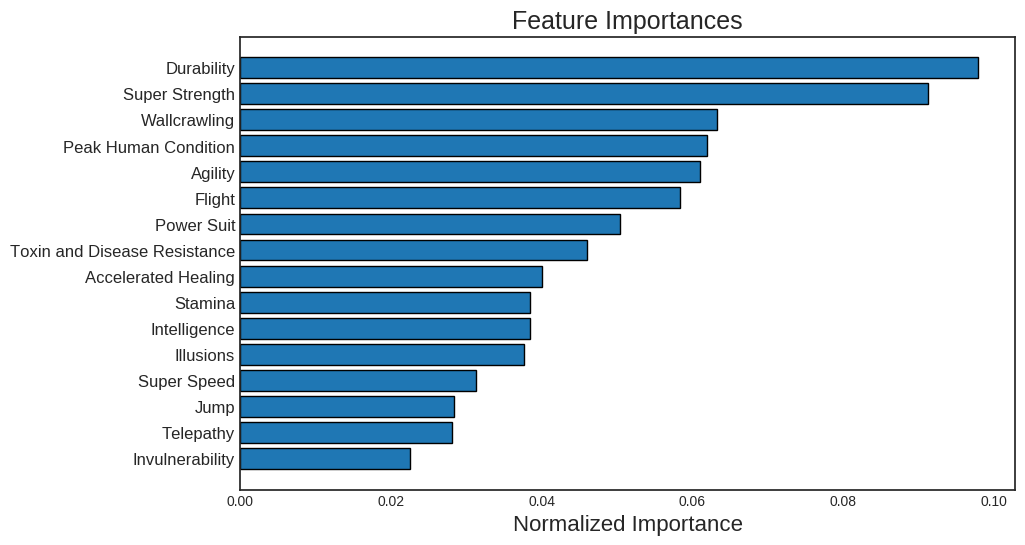

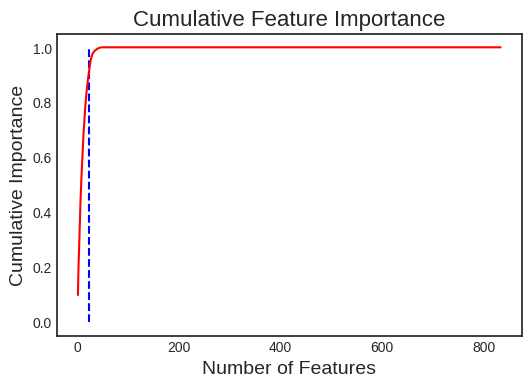

22 features required for 0.90 of cumulative importance


In [30]:
fs.plot_feature_importances(threshold=0.9,plot_n=16)

In [34]:
fs.identify_low_importance(cumulative_importance=0.9)

21 features required for cumulative importance of 0.90 after one hot encoding.
812 features do not contribute to cumulative importance of 0.90.



In [36]:
fs.feature_importances.head(20)

,feature,importance,normalized_importance,cumulative_importance
0,Durability,37.9,0.097908,0.097908
1,Super Strength,35.3,0.091191,0.189098
2,Wallcrawling,24.5,0.063291,0.252390
3,Peak Human Condition,24.0,0.061999,0.314389
4,Agility,23.6,0.060966,0.375355
5,Flight,22.6,0.058383,0.433738
6,Power Suit,19.5,0.050375,0.484113
7,Toxin and Disease Resistance,17.8,0.045983,0.530096
8,Accelerated Healing,15.5,0.040041,0.570137
9,Stamina,14.9,0.038491,0.608628


In [37]:
fs.identify_single_unique()

0 features with a single unique value.



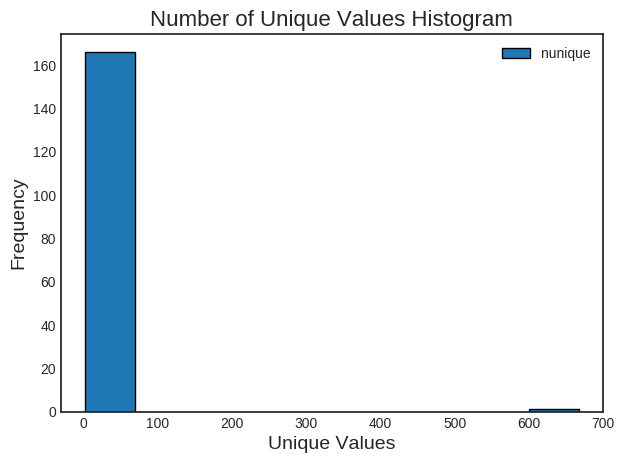

In [38]:
fs.plot_unique()

In [0]:
#train_removed_all=fs.remove(methods='collinear')

In [41]:
fs.identify_all(selection_params={'missing_threshold':0.6,
                                  'correlation_threshold':0.9,
                                  'task':'classification',
                                  'eval_metric':'auc',
                                  'cumulative_importance':0.9})
#running all at once

0 features with greater than 0.60 missing values.

0 features with a single unique value.

2 features with a correlation magnitude greater than 0.90.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[21]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:

In [42]:
train_removed_all=fs.remove(methods='all',keep_one_hot=False)

['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 809 features including one-hot features.


In [43]:
train_removed_all.head(20)

,hero_names,Agility,Accelerated Healing,Durability,Stealth,Flight,Danger Sense,Marksmanship,Intelligence,Super Strength,Telepathy,Energy Blasts,Stamina,Super Speed,Animal Oriented Powers,Enhanced Senses,Jump,Peak Human Condition,Reflexes,Invulnerability,Power Suit,Natural Weapons,Illusions,Toxin and Disease Resistance,Wallcrawling
0,3-D Man,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,False,False,True,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False
5,Abraxas,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
6,Absorbing Man,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7,Adam Monroe,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,True,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
9,Agent Bob,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
train_removed_all.shape

(667, 25)